# 芯片质量检测
1. 基于数据的高斯密度函数，寻找异常点
2. 对数据进行PCA处理，确定重要维度和成分
3. 完成数据分离，数据分离参数 random_state = 4, test_size = 0.4
4. 建立KNN模型进行分类，n_neighbors=10,计算分类准确性，可视化边界
5. 计算测数数据对应的混淆矩阵，计算准确率，召回率，特异度，精确率和F1分数
6. 尝试不同的n_neighbors，测试准确度

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/KNN/data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [2]:
# define the x and y
x = data.drop(['y'],axis=1)
x1 = x.loc[:,'x1']
x2 = x.loc[:,'x2']
y = data.loc[:,'y']

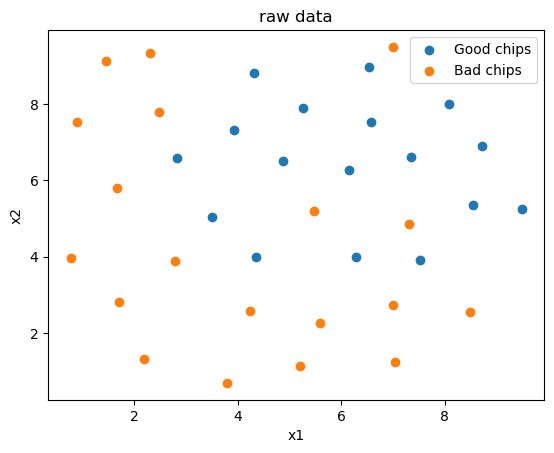

In [3]:
# visulize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
data_good = plt.scatter(x1[y==1],x2[y==1])
data_bad = plt.scatter(x1[y==0],x2[y==0])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((data_good,data_bad),('Good chips','Bad chips'))
plt.show()


In [4]:
# Anomaly detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination = 0.02)
ad_model.fit(x[y==0])
y_predict = ad_model.predict(x[y==0])
print(y_predict)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


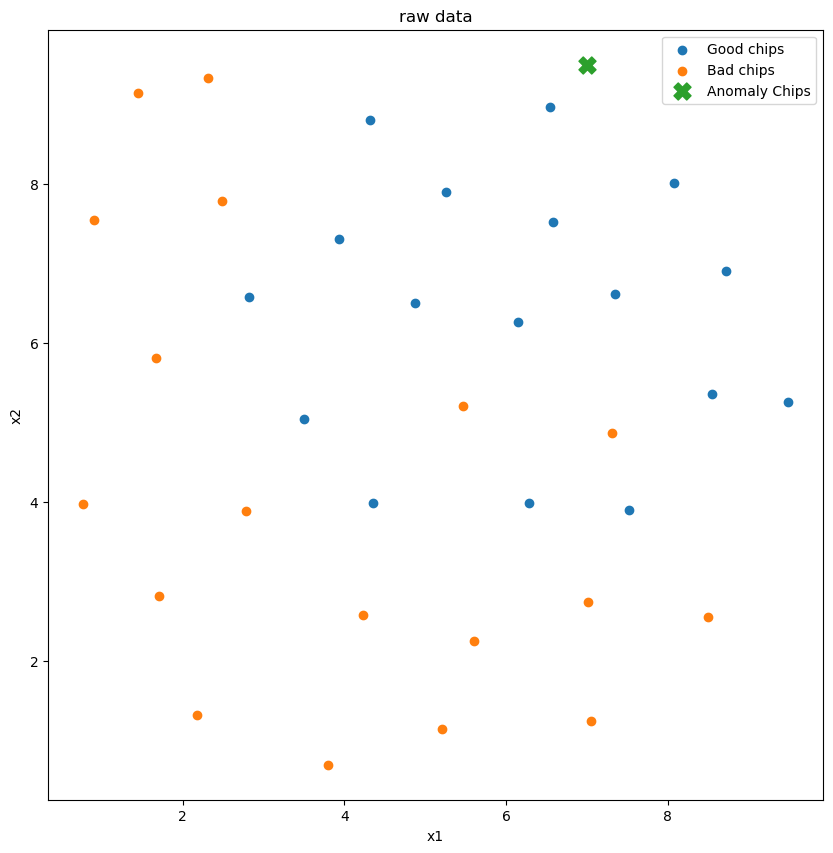

In [5]:
# visualize the data
fig2 = plt.figure(figsize=(10,10))
data_good = plt.scatter(x1[y==1],x2[y==1])
data_bad = plt.scatter(x1[y==0],x2[y==0])
data_anomaly = plt.scatter(x1[y==0][y_predict==-1],x2[y==0][y_predict==-1],marker='X',s=150)
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((data_good,data_bad,data_anomaly),('Good chips','Bad chips','Anomaly Chips'))
plt.show()


## 对数据进行PCA处理，确定重要维度和成分

In [6]:
data = pd.read_csv('./data/KNN/data_class_processed.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [7]:
# define x and y
x = data.drop(['y'], axis =1)
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']
y = data.loc[:,'y']

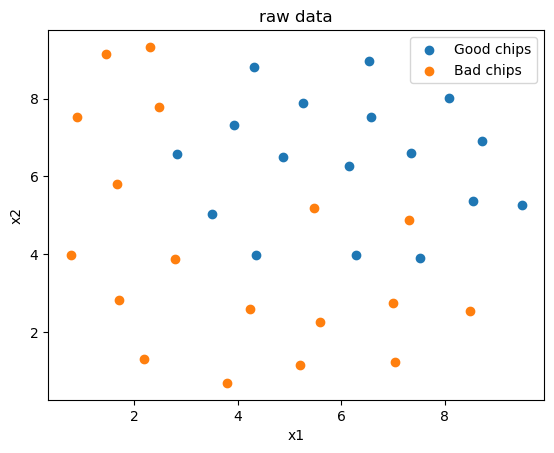

In [8]:
# visualize the data
fig3 = plt.figure()
data_good = plt.scatter(x1[y==1],x2[y==1])
data_bad = plt.scatter(x1[y==0],x2[y==0])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((data_good,data_bad),('Good chips','Bad chips'))
plt.show()

[0.5369408 0.4630592]


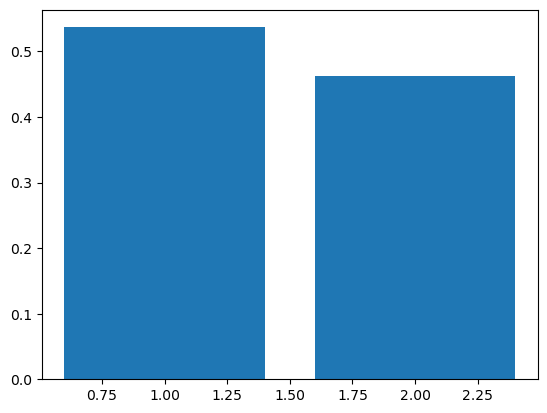

In [9]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure()
plt.bar([1,2], var_ratio)
plt.show()

# 数据分离

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.4)
print(x.shape,x_train.shape,x_test.shape)

(35, 2) (21, 2) (14, 2)


In [11]:
# establish KNN model
from sklearn.neighbors import KNeighborsClassifier
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train,y_train)
y_train_predict = knn10.predict(x_train)
y_test_predict = knn10.predict(x_test)

In [12]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test,accuracy_train)

0.6428571428571429 0.9047619047619048


In [13]:
# visulize the data and boundary
xx,yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
print(xx.shape)

(200, 200)


In [14]:
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [15]:
y_range_predict = knn10.predict(x_range)

/opt/anaconda3/envs/AI/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


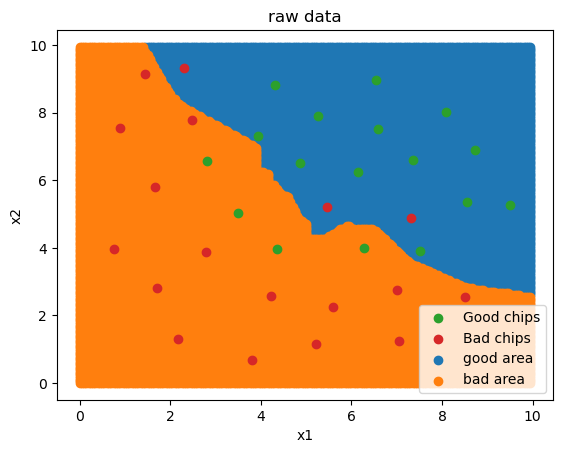

In [16]:
# visulize the data
fig5 = plt.figure()
knn_good =plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1])
knn_bad =plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0])
data_good = plt.scatter(x1[y==1],x2[y==1])
data_bad = plt.scatter(x1[y==0],x2[y==0])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((data_good,data_bad,knn_good,knn_bad),('Good chips','Bad chips','good area','bad area'))
plt.show()

# 计算混淆矩阵

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[4 2]
 [3 5]]


In [18]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP,TN,FP,FN)

5 4 2 3


In [19]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.6428571428571429


In [20]:
recall = TP/(TP+FN)
print(recall)

0.625


In [21]:
specificity = TN/(TN + FP)
print(specificity)

0.6666666666666666


In [22]:
precision = TP /(TP+FP)
print(precision)

0.7142857142857143


In [23]:
F1 = 2* precision * recall /(precision+recall)
print(F1)

0.6666666666666666


# 尝试不同的n_neighbors(1-20)计算训练集测试准确度

In [24]:
n = [i for i in range(1,21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_train_predict = knn.predict(x_train)
    y_test_predict = knn.predict(x_test)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
print(accuracy_train,accuracy_test)
    


[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


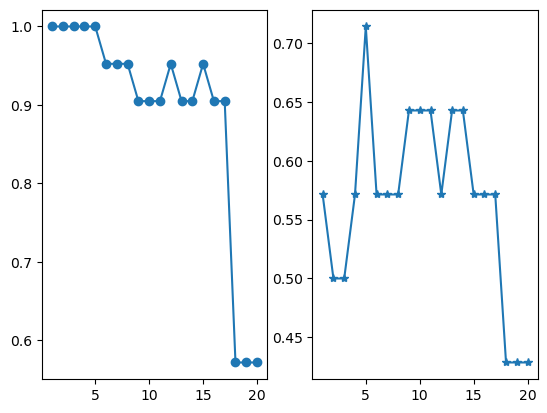

In [25]:
# visulize the acuurancy result
fig6 = plt.figure()
plt.subplot(121)
plt.plot(n,accuracy_train,marker = 'o')
plt.subplot(122)
plt.plot(n,accuracy_test,marker = '*')
plt.show()